## 0. Download dataset

In [ ]:
# https://drive.google.com/file/d/1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31/view?usp=sharing
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31

Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=ac9575e2-2b22-4978-9c5c-0b713f5c8bd7
To: /content/cars_yolo_data.zip
100% 37.7M/37.7M [00:01<00:00, 20.9MB/s]


In [ ]:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31

Downloading...
From (original): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
From (redirected): https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31&confirm=t&uuid=0e79ceaf-01e7-418b-8a7f-fc8a2e142f9f
To: /content/cars_yolo_data.zip
100% 37.7M/37.7M [00:00<00:00, 98.4MB/s]


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/Coordinate/dataset/cars_yolo_data.zip .

cp: cannot stat '/content/gdrive/MyDrive/Coordinate/dataset/cars_yolo_data.zip': No such file or directory


In [ ]:
!unzip /content/cars_yolo_data.zip

Archive:  /content/cars_yolo_data.zip
   creating: yolo_data/
   creating: yolo_data/val/
   creating: yolo_data/val/images/
  inflating: yolo_data/val/images/vid_4_28440.jpg  
  inflating: yolo_data/val/images/vid_4_13700.jpg  
  inflating: yolo_data/val/images/vid_4_1900.jpg  
  inflating: yolo_data/val/images/vid_4_9640.jpg  
  inflating: yolo_data/val/images/vid_4_13880.jpg  
  inflating: yolo_data/val/images/vid_4_1980.jpg  
  inflating: yolo_data/val/images/vid_4_9220.jpg  
  inflating: yolo_data/val/images/vid_4_26380.jpg  
  inflating: yolo_data/val/images/vid_4_12140.jpg  
  inflating: yolo_data/val/images/vid_4_26460.jpg  
  inflating: yolo_data/val/images/vid_4_9200.jpg  
  inflating: yolo_data/val/images/vid_4_21260.jpg  
  inflating: yolo_data/val/images/vid_4_2080.jpg  
  inflating: yolo_data/val/images/vid_4_3820.jpg  
  inflating: yolo_data/val/images/vid_4_6280.jpg  
  inflating: yolo_data/val/images/vid_4_9040.jpg  
  inflating: yolo_data/val/images/vid_4_30440.jpg  


## 1. Import libraries

In [ ]:
import os

len(os.listdir('/content/yolo_data/train/images'))

345

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
import os
import cv2
import json
import matplotlib.pyplot as plt

from ultralytics import YOLO

## 2. Training

In [ ]:
from ultralytics import YOLO

# Load a model
yolo_yaml_path = 'yolo_data/data.yml'
model = YOLO('yolov8s.yaml').load('yolov8s.pt')

# Set up some important parameters
epochs = 15
imgsz = 640
batch_size = 8
patience = 5
lr = 0.0005

results = model.train(
    data=yolo_yaml_path,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    lr0=lr,
    patience=patience,
    project='models',
    name='yolov8/detect/train'
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 245MB/s]

Transferred 355/355 items from pretrained weights


Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=yolo_data/data.yml, epochs=15, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 62.6MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_data/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 359.29it/s]

train: New cache created: /content/yolo_data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/yolo_data/val/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 229.67it/s]

val: New cache created: /content/yolo_data/val/labels.cache


Plotting labels to models/yolov8/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to models/yolov8/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.49G      1.461      1.771      1.181          3        640: 100%|██████████| 44/44 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         26         28     0.0838      0.893     0.0785      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.41G      1.323     0.9488      1.134          1        640: 100%|██████████| 44/44 [00:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         26         28      0.374      0.857      0.392      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.43G      1.339     0.9643      1.146          7        640: 100%|██████████| 44/44 [00:12<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         26         28      0.388      0.893      0.377      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.43G      1.354      0.833      1.147          5        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         26         28       0.39      0.857      0.478      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.38G      1.283     0.7195      1.118          1        640: 100%|██████████| 44/44 [00:10<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         26         28      0.409          1      0.422      0.249


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.41G      1.256     0.7984      1.138          1        640: 100%|██████████| 44/44 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         26         28       0.36      0.784      0.338       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       2.4G      1.232     0.7052      1.117          1        640: 100%|██████████| 44/44 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         26         28      0.393      0.893      0.433       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.42G      1.238     0.6845      1.137          1        640: 100%|██████████| 44/44 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         26         28      0.413          1      0.491      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.38G       1.21      0.728      1.135          1        640: 100%|██████████| 44/44 [00:07<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         26         28      0.437      0.893      0.451      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.42G       1.21     0.6742      1.114          3        640: 100%|██████████| 44/44 [00:12<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         26         28      0.423      0.943      0.523      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.4G      1.206     0.6471      1.135          1        640: 100%|██████████| 44/44 [00:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         26         28      0.438      0.929      0.495      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.41G      1.201     0.6114       1.11          2        640: 100%|██████████| 44/44 [00:10<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         26         28      0.426      0.926      0.592      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.38G       1.14     0.5932      1.085          1        640: 100%|██████████| 44/44 [00:09<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         26         28       0.43      0.964      0.491      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.41G      1.116     0.5584      1.064          1        640: 100%|██████████| 44/44 [00:09<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         26         28      0.427          1      0.494      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       2.4G      1.123     0.5489      1.076          3        640: 100%|██████████| 44/44 [00:10<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         26         28      0.431          1      0.497      0.335



15 epochs completed in 0.051 hours.
Optimizer stripped from models/yolov8/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from models/yolov8/detect/train/weights/best.pt, 22.5MB

Validating models/yolov8/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


                   all         26         28      0.426      0.926       0.59      0.425
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to models/yolov8/detect/train


## 3. Evaluation

In [ ]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project='models',
    name='yolov8/detect/val'
)

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/yolo_data/val/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


                   all         26         28      0.426      0.929      0.592      0.423
Speed: 0.5ms preprocess, 37.3ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to models/yolov8/detect/val


## 4. Inference

In [ ]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_path = '/content/yolo_data/train/images/vid_4_10140.jpg'

model = YOLO(model_path)

In [ ]:
results = model.predict([], save=True)


0: 384x640 1 car, 1: 384x640 1 car, 238.4ms
Speed: 4.6ms preprocess, 119.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


In [ ]:
import json

json.loads(results[0].tojson())

[{'name': 'car',
  'class': 0,
  'confidence': 0.7263683080673218,
  'box': {'x1': 0.0,
   'y1': 193.46774291992188,
   'x2': 83.70724487304688,
   'y2': 240.2203826904297}}]

In [ ]:
import os
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_dir = '/content/yolo_data/val/images'

model = YOLO(model_path)

for img_name in os.listdir(test_img_dir):
    # /content/yolo_data/val/images/vid_4_12380.jpg
    img_path = os.path.join(test_img_dir, img_name)
    results = model.predict(img_path, save=True)


image 1/1 /content/yolo_data/val/images/vid_4_28440.jpg: 384x640 3 cars, 14.1ms
Speed: 2.5ms preprocess, 14.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5

image 1/1 /content/yolo_data/val/images/vid_4_13700.jpg: 384x640 4 cars, 22.1ms
Speed: 2.4ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5

image 1/1 /content/yolo_data/val/images/vid_4_1900.jpg: 384x640 2 cars, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5

image 1/1 /content/yolo_data/val/images/vid_4_9640.jpg: 384x640 3 cars, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5

image 1/1 /content/yolo_data/val/images/vid_4_13880.jpg: 384x640 2 cars, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postproc

In [ ]:
import cv2
import json
import matplotlib.pyplot as plt

def visualize_bbox(
    img_path, predictions,
    conf_thres=0.8,
    font=cv2.FONT_HERSHEY_SIMPLEX
):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    for prediction in predictions:
        conf_score = prediction['confidence']

        if conf_score < conf_thres:
            continue

        bbox = prediction['box']
        xmin = int(bbox['x1'])
        ymin = int(bbox['y1'])
        xmax = int(bbox['x2'])
        ymax = int(bbox['y2'])

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)


        text = f"{conf_score:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(text, font, 1, 2)

        cv2.rectangle(img, (xmin, ymin - text_height - 5), (xmin + text_width, ymin), (0, 255, 0), -1)
        cv2.putText(img, text, (xmin, ymin - 5), font, 1, (0, 0, 0), 2)

    return img

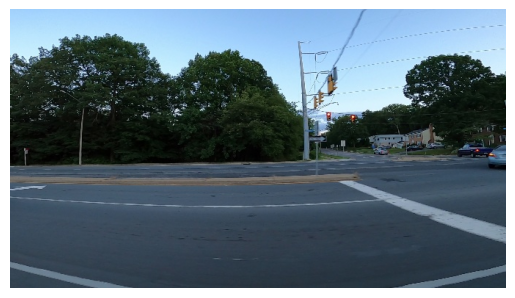

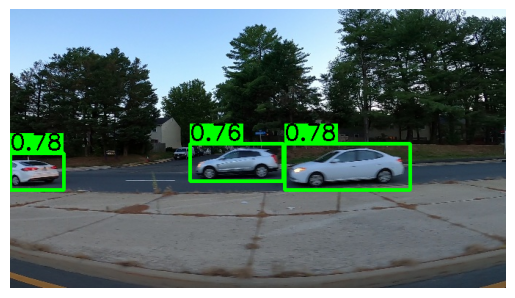

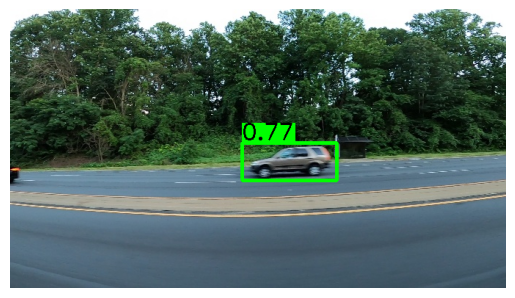

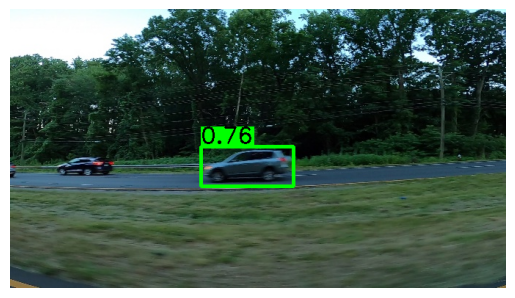

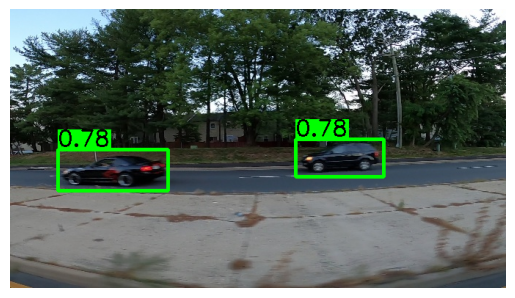

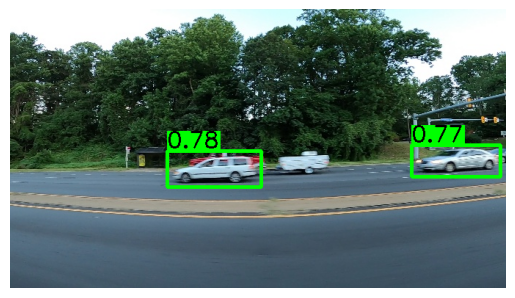

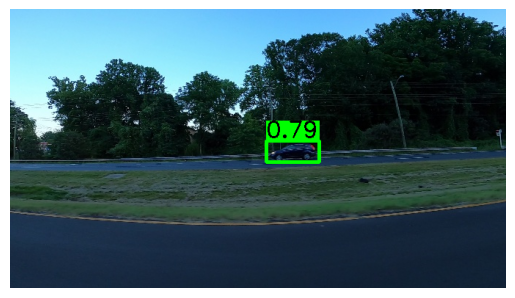

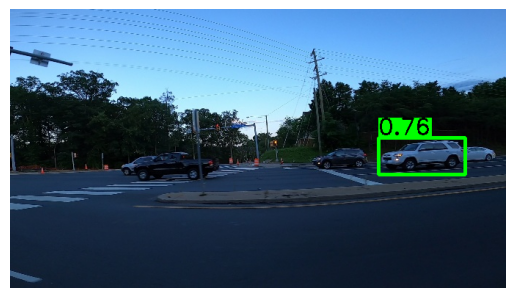

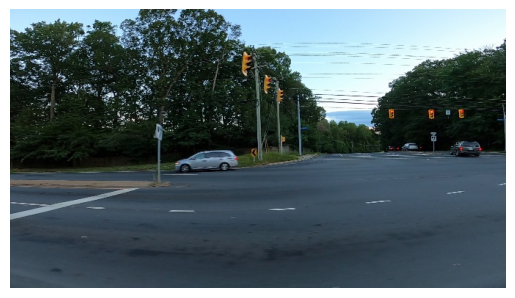

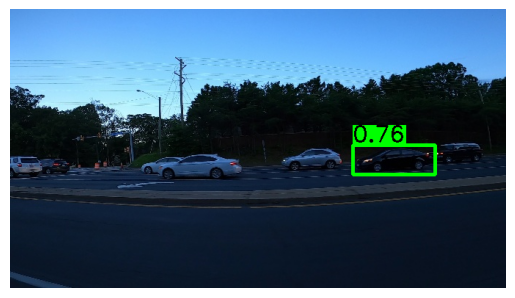

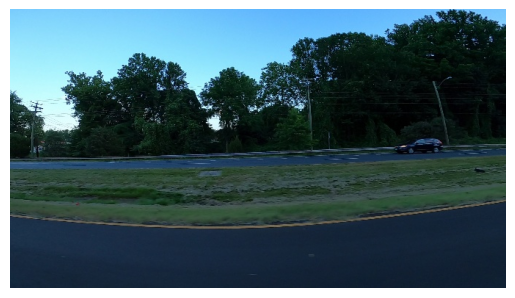

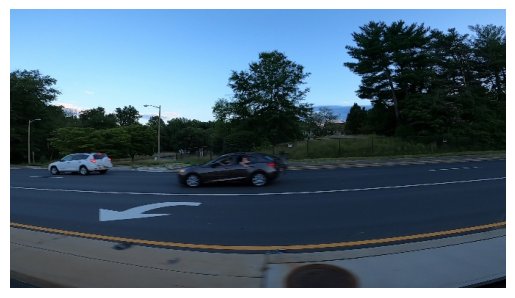

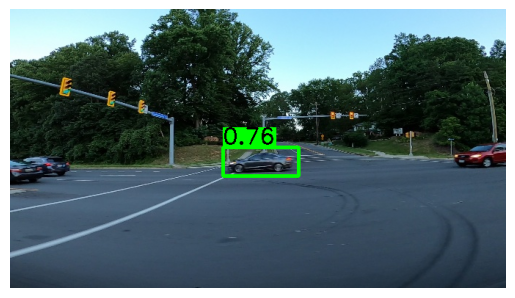

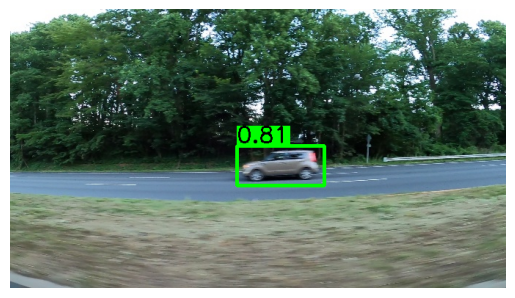

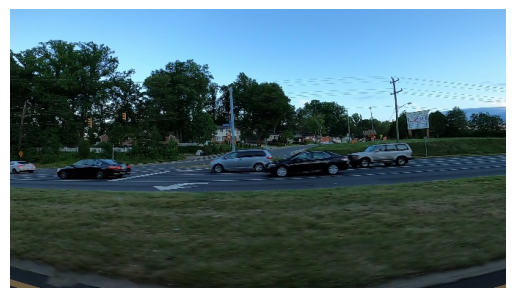

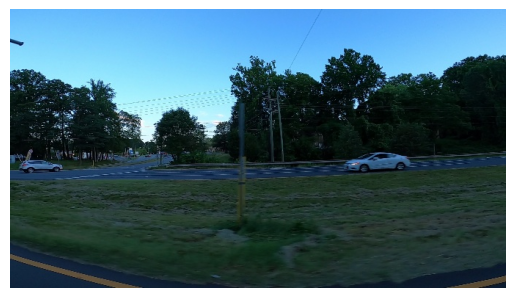

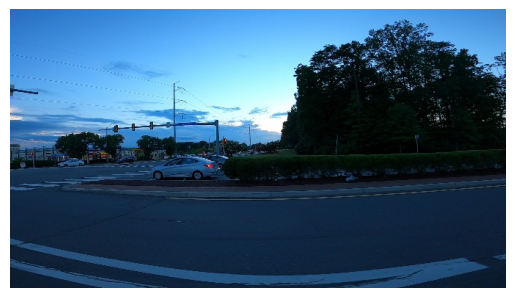

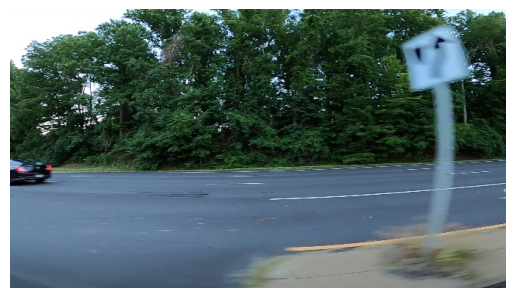

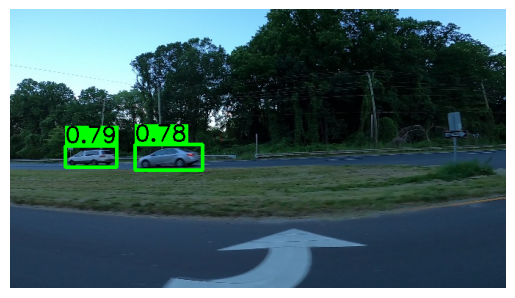

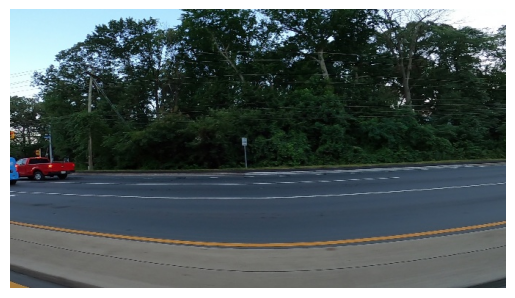

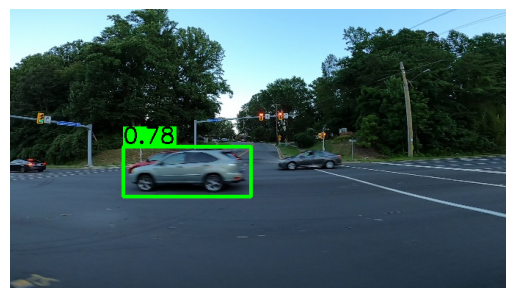

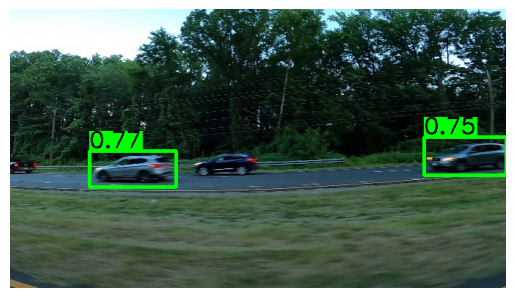

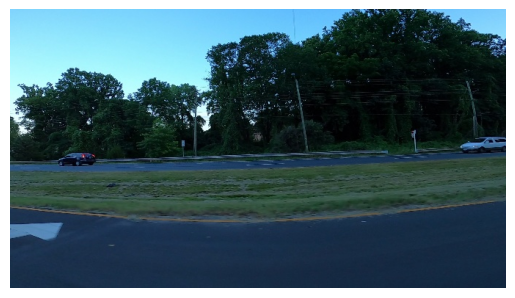

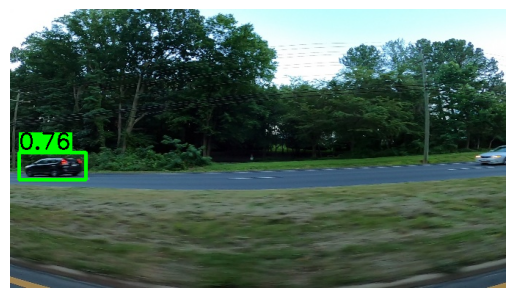

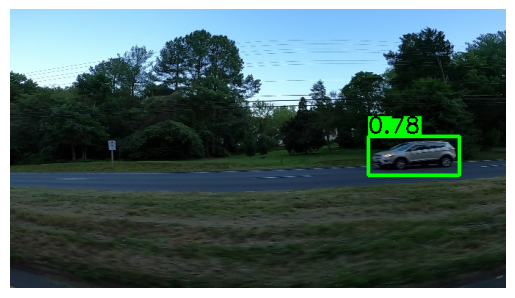

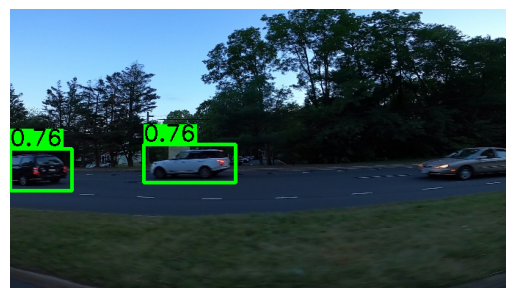

In [ ]:
import os
import json
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_dir = '/content/yolo_data/val/images'
conf_thres=0.75

model = YOLO(model_path)
for img_name in os.listdir(test_img_dir):
    img_path = os.path.join(test_img_dir, img_name)

    # Run inference
    results = model(img_path, verbose=False)
    predictions = json.loads(results[0].tojson())
    visualized_img = visualize_bbox(img_path, predictions, conf_thres)


    %matplotlib inline
    plt.imshow(visualized_img)
    plt.axis('off')
    plt.show()

In [ ]:
from ultralytics import YOLO

model_path = 'models/yolov8/detect/train/weights/best.pt'
test_img_dir = '/content/yolo_data/val/images'
conf_thres=0.75

model = YOLO(model_path)
results = model.predict(
    'https://www.youtube.com/watch?v=Gr_eUDukd-0',
    save=True
)

Streaming output truncated to the last 5000 lines.
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 1 car, 17.4ms
0: 384x640 1 car, 13.1ms
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WAR